In [1]:
#pip install pytesseract

In [2]:
#!apt-get install poppler-utils 

In [3]:
##pip install python-poppler
#!pip install pdf2image

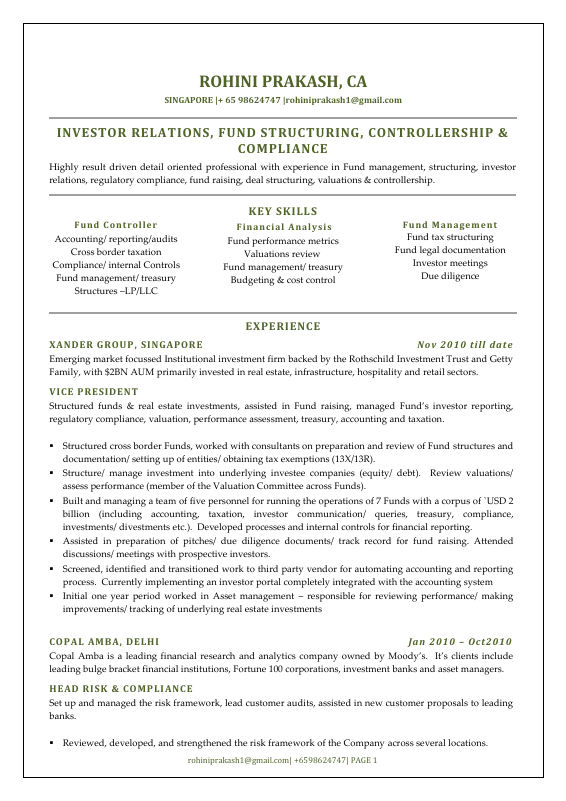

In [4]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

images = convert_from_bytes(open('/content/Resume --Rohini Prakash.pdf', 'rb').read(), size=800)
display(images[0])

In [5]:
import os
import tempfile
from pdf2image import convert_from_path
from PIL import Image

In [6]:
def convert_pdf(file_path, output_path):
    # save temp image files in temp dir, delete them after we are finished
    with tempfile.TemporaryDirectory() as temp_dir:

        # convert pdf to multiple image
        images = convert_from_path(file_path, output_folder=temp_dir)

        # save images to temporary directory
        temp_images = []
        for i in range(len(images)):
            image_path = f'{temp_dir}/{i}.jpg'
            images[i].save(image_path, 'JPEG')
            temp_images.append(image_path)

        # read images into pillow.Image
        imgs = list(map(Image.open, temp_images))

    # find minimum width of images
    min_img_width = min(i.width for i in imgs)

    # find total height of all images
    total_height = 0
    for i, img in enumerate(imgs):
        total_height += imgs[i].height

    # create new image object with width and total height
    merged_image = Image.new(imgs[0].mode, (min_img_width, total_height))

    # paste images together one by one
    y = 0
    for img in imgs:
        merged_image.paste(img, (0, y))
        y += img.height

    # save merged image
    merged_image.save(output_path)

    return output_path

In [7]:
convert_pdf('/content/Resume --Rohini Prakash.pdf','/content/outputimage.jpg')

'/content/outputimage.jpg'

In [8]:
#pip install opencv-python

In [9]:
#pip uninstall opencv-python-headless==4.5.5.62

In [10]:
#pip install opencv-python-headless==4.5.2.52


In [11]:
import cv2

from google.colab.patches import cv2_imshow



In [12]:

image = cv2.imread("/content/outputimage.jpg")
#image

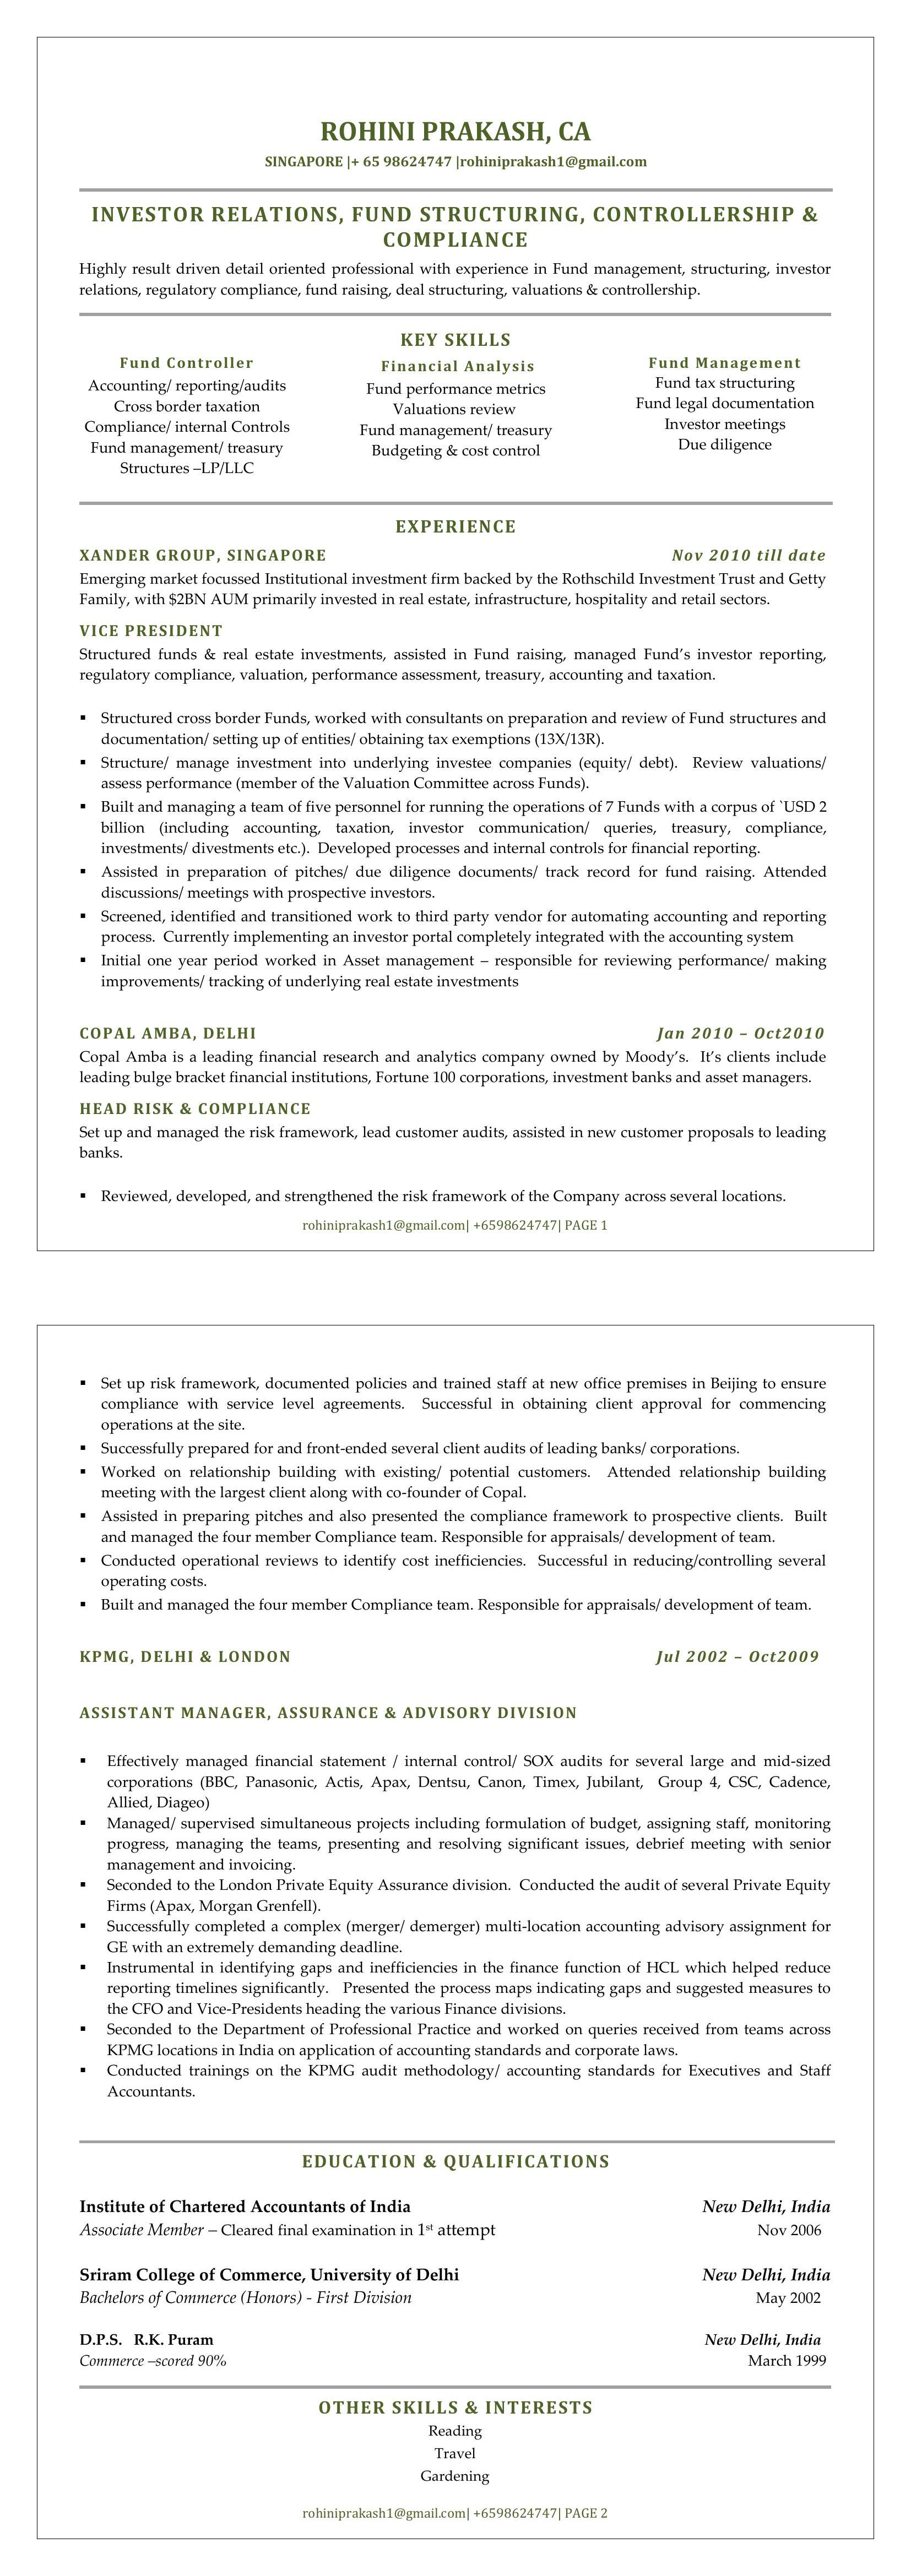

In [13]:
cv2_imshow(image)

In [14]:
#pip install easyocr

In [15]:
from easyocr import Reader
import matplotlib.pyplot as plt


In [16]:
reader = Reader(['en']) 

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [17]:
res = reader.readtext('/content/outputimage.jpg', paragraph='True') 

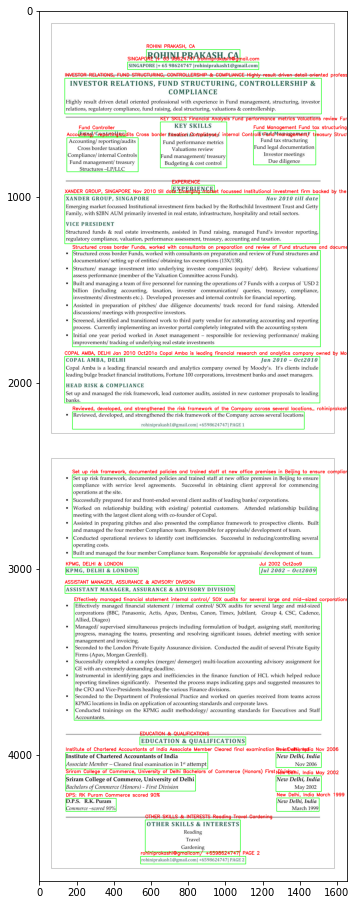

In [18]:

for (bbox, text) in res: 
  # unpack the bounding box
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  cv2.rectangle(image, tl, br, (0, 255, 0), 2)
  cv2.putText(image, text, (tl[0], tl[1] - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
plt.rcParams['figure.figsize'] = (16,16)
plt.imshow(image)

In [19]:
data = [item[-1] for item in res]
print(data[0:2])


['ROHINI PRAKASH, CA', 'SINGAPORE |+ 65 98624747 |rohiniprakashl@gmail.com']


In [20]:
#!pip install spacy

In [21]:
#!pip install spacy-transformers
#!python -m spacy download en_core_web_trf

In [22]:
#!pip install click==7.1.1


In [23]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [24]:
doc = nlp(".".join(data))
for ent in doc.ents:
  print(ent.text,ent.label_)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


ROHINI PRAKASH ORG
CA.SINGAPORE GPE
SINGAPORE GPE
Nov 2010 DATE
the Rothschild Investment Trust ORG
Getty Family ORG
$2BN AUM MONEY
the Valuation Committee across Funds ORG
five CARDINAL
'USD 2 billion MONEY
one year DATE
COPAL AMBA ORG
DELHI GPE
Jan 2010 DATE
Copal Amba ORG
HEAD RISK & COMPLIANCE ORG
Beijing GPE
Copal ORG
four CARDINAL
four CARDINAL
DELHI GPE
LONDON.Jul GPE
BBC ORG
Panasonic ORG
Actis ORG
Apax ORG
Dentsu ORG
Canon ORG
Timex ORG
Jubilant ORG
CSC ORG
Cadence ORG
Allied ORG
Diageo ORG
Apax Morgan Grenfell ORG
GE ORG
HCL ORG
the Department of Professional Practice ORG
KPMG ORG
India GPE
KPMG ORG
New Delhi GPE
India GPE
2006.Sriram College of Commerce ORG
University of Delhi Bachelors of Commerce (Honors) First Division ORG
New Delhi GPE
India GPE
May 2002.DPS DATE
RK Puram Commerce ORG
India GPE
2 CARDINAL
